<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Mini Project I - Machine Learning Supervised Regression
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="NEW_GL_Logo.png">
        </td>
    </tr>
</table>



Shafeenafarheen Jageerhussain

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import warnings
warnings.filterwarnings("ignore")

### A. Read the Dataset "turnout.csv" 

In [2]:
#Reading the dataset from the turnout.csv file and displaying the first 5 rows
#As the .csv file isn't UTF-8 encoded, we need to pass the encoding type as "ANSI" to extract the data
employee_turnout = pd.read_csv("Mini-Project I - Group 12 - Dataset - turnout.csv",encoding="ANSI")
employee_turnout.head()

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


### B.Identify non-numerical inputs and convert into numerical whatever needed 
(*Hint: Use replace function if needed)

In [3]:
#Displying the datatypes of the features from the loaded dataset before conversion
print("Datatypes of features before numerical conversion:\n\n",employee_turnout.dtypes)

Datatypes of features before numerical conversion:

 Employee ID       int64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object


In [4]:
#Converting the "head_gender" and "coach" field object to numerical datatype
#This operation was performed as it was a requirement, but in reality these 2 conversions may not make much sense

employee_turnout_copy = employee_turnout.copy()
employee_turnout_copy['head_gender']=np.where(employee_turnout['head_gender']=='m',0,1)
employee_turnout_copy['coach']=np.where(employee_turnout['coach']=='yes',1,0)

#Employee Id can be convered as a categorical, as the there is no real requirement to retain it in numerical
#In addition, there is no point in determining the mean, median etc.
employee_turnout["Employee ID"] = employee_turnout["Employee ID"].astype('str')

employee_turnout_copy.head()

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,0,1,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,0,0,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,0,0,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,0,0,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,1,1,white,bus,3.0,4.1,8.0,7.1,3.7


In [5]:
#Displying the datatypes of the features from the loaded dataset before conversion
print("Datatypes of features after numerical conversion:\n\n",employee_turnout_copy.dtypes)

Datatypes of features after numerical conversion:

 Employee ID       int64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach             int32
head_gender       int32
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object


### C. Describe the statistical measures using single function 

In [6]:
#Describing the various statistical measures for numerical dataset
employee_turnout.describe()

,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1128.000000,1127.000000,1128.000000,1128.000000,1128.000000
mean,0.505757,31.050136,5.593262,5.480479,5.593794,5.667110,5.881560
std,0.500188,7.419808,1.852222,1.703578,1.977562,1.709213,1.903753
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,0.000000,25.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,1.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### D.Find mean, median and mode for atleast one possible column for each 

In [7]:
#Calculating the mean and median for the numerical features - i.e., age and anxiety
print("a. Average age of employee is",employee_turnout["age"].mean())
print("\nb. Median value of anxiety is",employee_turnout["anxiety"].median())

#Calculating the mode for categoric feature - i.e., industry
#It follows unimodel, as we have only one industry (i.e., Retail) with highest frequency
print("\nc. Industry which has highest turnout (i.e., {}) is {}".
      format(employee_turnout["industry"].value_counts()["Retail"],
             employee_turnout["industry"].mode()[0]))

a. Average age of employee is 31.050135512072632

b. Median value of anxiety is 5.6

c. Industry which has highest turnout (i.e., 289) is Retail


### E.Check the outliers and remove it from the dataset. 

<Figure size 7200x3600 with 0 Axes>

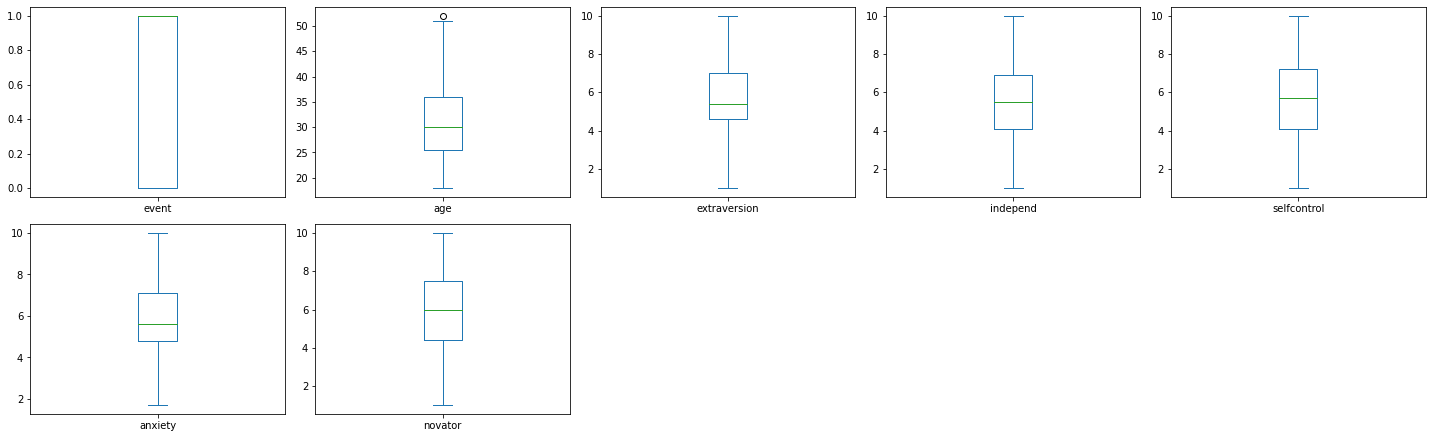

The rows and columns:
	a. before applying the outlier treatment (1119, 16)
	b. after the outlier treatment (1118, 16)


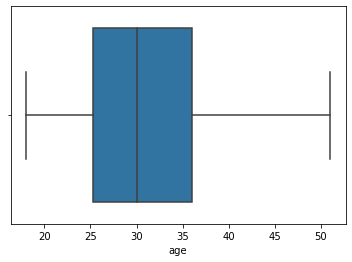

In [9]:
#Visualize the box plot for outliers

#Set the figure size
plt.figure(figsize = [100,50])

#Create a box plot for all numeric variables
#kind = 'box' : Specifies a box plot
#subplots = True : Specifies the subplots to created a each numerical variables
#layout: Specifies the number of rows and columns for the subplot
#figsize: to set the figure size of the subplot
employee_turnout.plot(kind='box',subplots=True, layout=(5,5), figsize=(20,15))

#To give specified padding between the subplots
plt.tight_layout()

#Display the plot
plt.show()

#To detect the no. of rows and cols. before applying the outlier treatment
print("The rows and columns:\n\ta. before applying the outlier treatment", employee_turnout.shape)

#Calculating the IQR, Upperbound and Lowerbound, to detect the outliers
IQR = employee_turnout["age"].quantile(0.75) - employee_turnout["age"].quantile(0.25)
upperBound = employee_turnout['age'].quantile(0.75) + 1.5 * IQR
lowerBound = employee_turnout['age'].quantile(0.25) - 1.5 * IQR

#Outlier Treatment
employee_turnout = employee_turnout[~( (employee_turnout['age'] > upperBound) | (employee_turnout['age'] < lowerBound) )]

#To detect the no. of rows and cols. after applying the outlier treatment
print("\tb. after the outlier treatment", employee_turnout.shape)

#Visualize the box plot for outliers present in age
sns.boxplot(employee_turnout.age)
plt.show()

### F. A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year 

In [10]:
#Applying Poisson probability function

#stats.poisson.pmf(x,lambda)
#where x = 2 (i.e.,cyclones/year); lambda = 3 (i.e., avg. cyclone every year)
print("Probability of same city getting affected by exactly 2 cyclones in the upcoming year:",
      round(stats.poisson.pmf(2,3)*100,2),"%")

Probability of same city getting affected by exactly 2 cyclones in the upcoming year: 22.4 %


### G.If an athlete attended 6 olympics in his lifetime. Find the probability if he exactly have 2 wins 

In [11]:
#Applying Binomial probability function

x=2   #Propability for exactly 2 wins
n=6   #Total Sample Count
p=0.5 #Probability of winning the Olympics

#stats.binom.pmf(x,n,p)
print("The probability of exactly have 2 wins using Binomial Distribution:",round(stats.binom.pmf(x,n,p)*100,3),"%")

The probability of exactly have 2 wins using Binomial Distribution: 23.438 %
